<div>
<img src="nick-fewings-61LcmrqKMEw-unsplash.jpg" width="400" height="266"/>
</div>


## Animated Movies Exploratory Data Analysis

This is a short notebook that uses Python to perform some exploratory data analysis on a dataset downloaded from Kaggle

- Name: 52,000 Animation Movie Details (2024)
- Dataset: Animation_Movies.csv
- Author of Dataset: ASANICZKA
- License: ODC Attribution License
- Link: https://www.kaggle.com/datasets/asaniczka/52000-animation-movie-details-dataset-2024/data
- image: Photo by <a href="https://unsplash.com/@jannerboy62?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Nick Fewings</a> on <a href="https://unsplash.com/photos/text-61LcmrqKMEw?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>


#### Interesting task ideas
1. Analyze the popularity of animation movies across different genres
2. Extract key insights on budget and revenue trends in the animation film industry.
3. Train a machine learning model to predict movie ratings based on various features
4. Explore the relationship between runtime and movie popularity.
5. Identify the most common languages and production companies in animation movies.
6. Create a recommendation system for animation movie enthusiasts.
7. Analyze the release date patterns and their impact on revenue.
  

### Loading the dataset

The first task is to load the dataset into a pandas dataframe so that we can conduct our analysis. 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = "Animation_Movies.csv"
df = pd.read_csv(dataset)

# Confirm that the data has loaded
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [3]:
# Confirm the number of rows and the columns in the dataset
df.shape

(51945, 23)

This number is not 52,000, but it is close enough for the orignal poster to claim it is!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

Taking a look at the columns above, we can then decide which columns are important to us. There are some columns we will not need to use in our analysis

The columns I will drop are:
- backdrop_path
- poster_path
- overview
- homepage
- status
- id (This id will not help us as an index as their are gaps in the data)

In [5]:
df.drop(['backdrop_path','poster_path','overview','homepage','status','id','imdb_id'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 51944 non-null  object 
 1   vote_average          51945 non-null  float64
 2   vote_count            51945 non-null  int64  
 3   release_date          49808 non-null  object 
 4   revenue               51945 non-null  int64  
 5   runtime               51945 non-null  int64  
 6   adult                 51945 non-null  bool   
 7   budget                51945 non-null  int64  
 8   original_language     51945 non-null  object 
 9   original_title        51944 non-null  object 
 10  popularity            51945 non-null  float64
 11  tagline               4678 non-null   object 
 12  genres                51945 non-null  object 
 13  production_companies  29398 non-null  object 
 14  production_countries  39700 non-null  object 
 15  spoken_languages   

### Handling missing and duplicate data, and changing date format

We can run the below code to find how many of the columns have missing data

In [7]:
df.isnull().sum()

title                       1
vote_average                0
vote_count                  0
release_date             2137
revenue                     0
runtime                     0
adult                       0
budget                      0
original_language           0
original_title              1
popularity                  0
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

We can see that there are many missing values. As there are many missing values on the 'production_companies', 'production_countries', and 'spoken_languages', we can run code to fill the missing values with other values. Removing that many values would compromise the analysis of the data

In [8]:

#This will fill any missing data in the columns with 'Unknown'
df['production_companies'].fillna('Unknown',inplace=True)
df['production_countries'].fillna('Unknown',inplace=True)

#We can use the data from the 'original_language' column to fill the missing data in the 'spoken_languages' column
df['spoken_languages'].fillna(df['original_language'], inplace=True)

#This will fill any missing data in the column with 'no tagline'
df['tagline'].fillna('no tagline',inplace=True)


We are now left with the missing data in the 'title', 'release_date' and 'original_title'. AS there are far fewer missing data points, we will drop any row that has these missing data points

In [9]:
df.dropna(inplace=True)

We can now confirm that there are no more missing data points and there are still 49,807 rows of data to work with

In [10]:
df.isnull().sum()

title                   0
vote_average            0
vote_count              0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
original_title          0
popularity              0
tagline                 0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64

In [11]:
df.shape

(49807, 16)

Currently, in the 'release_date' column, we have the dates in the format yyyy-mm-dd. We want to be able to find the release year for easier analysis.

In [12]:
#Firstly, convert the column data to datetime using the pandas library
df['release_date'] = pd.to_datetime(df['release_date'])

#Then create a new column which contains the year pulled from the 'release_date' column
df['release_year'] = df['release_date'].dt.year

#Check the data
df.head()


,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages,release_year
0,Inside Out,7.922,19463,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English,2015
1,Up,7.949,18857,2009-05-28,735099082,96,False,175000000,en,Up,90.968,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English,2009
2,Finding Nemo,7.824,18061,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English,2003
3,Coco,8.222,17742,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish",2017
4,WALL·E,8.078,17446,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English,2008


The final check is to confirm there are no duplicates. We will use the 'title' column to check for any duplicates

In [13]:
df.duplicated('title').sum()

2416

In [14]:
#Drop duplicates using the 'title' column
df.drop_duplicates('title',inplace=True)

In [15]:
#Confirm that the correct amount of rows have been removed
df.shape

(47391, 17)

### Exploratory Data Analysis

Now that we have cleaned the data, it is now ready for us to perform Exploratory Data Analysis and answer some questions

#### Task 1: What is the most popular genre in Animation films

The issue we have with this task is that there are multiple values in the genre column. We will need to find a way to split the values in the column so that we can count which genre tag is the most popular

In [16]:
df['genres'].unique()

array(['Animation, Family, Adventure, Drama, Comedy',
       'Animation, Comedy, Family, Adventure', 'Animation, Family', ...,
       'Animation, Fantasy, TV Movie, Family',
       'Drama, Comedy, Adventure, Animation, Fantasy, TV Movie, Family',
       'Drama, Comedy, Documentary, History, Animation'], dtype=object)

As you can see, Animation is in nearly all the unique values (which is to be expected). We need to find a way to split these values so we can get an individual count of the genres

In [17]:
#Create an empty dictionary
genre_frequency = {}

#Create a for loop that splits the words in each row into a separate string using the ',' as the delimiter
for row in df["genres"].str.split(","): 
    # Create a for loop that goes through each individual string in the row
    for word in row:
        # remove the spaces at the begining and the end of the string
        word = word.strip()
        # Create an if statement that checks if the word is already in the dictionary. 
        # If it is it will add 1 to it's value, if not, it will add the word to the dictionary with a value of 1
        if word in genre_frequency:
            genre_frequency[word] += 1
        else:
            genre_frequency[word] = 1


# Create a new dataframe from the dictionary that sorts the values by the largest value. We will then pick the top 10
frequency_df = pd.DataFrame.from_dict([genre_frequency]).T.sort_values(by=0, ascending=False).head(10)
frequency_df



,0
Animation,47399
Comedy,7422
Family,6956
Fantasy,3533
Adventure,3245
Drama,2546
Science Fiction,2364
Action,2292
Documentary,1748
Music,1569


Now we have the genre tags split correctly, we can run some analysis

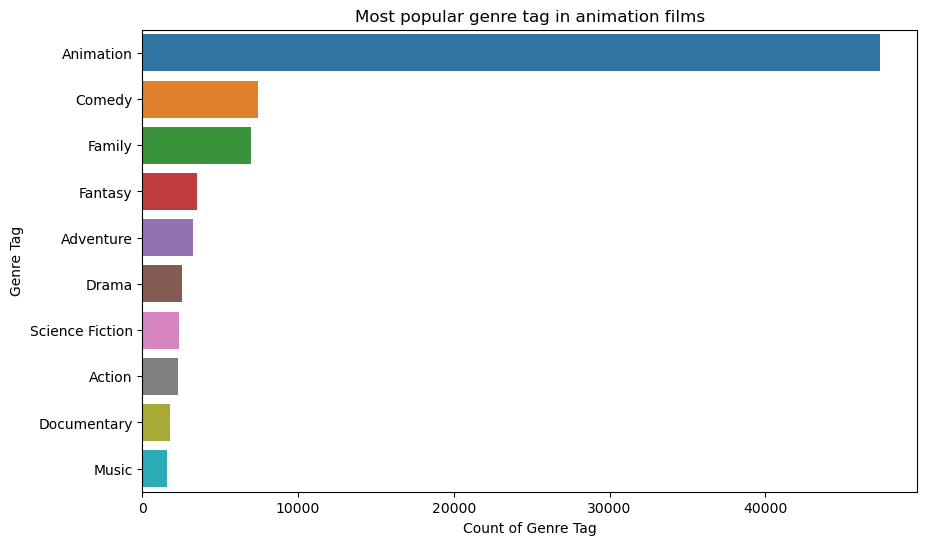

In [18]:
#frequency_df.columns = ['frequency']

plt.figure(figsize=(10,6))
sns.barplot(data=frequency_df, x=0, y=frequency_df.index)
plt.title('Most popular genre tag in animation films')
plt.xlabel('Count of Genre Tag')
plt.ylabel('Genre Tag')
plt.show()

The above plot is not very clear. However, as we know that we are dealing with Animation films, we can remove the Animation tag so we can see the other tags more clearly

In [19]:
frequency_df.drop(index='Animation',inplace=True)
frequency_df

,0
Comedy,7422
Family,6956
Fantasy,3533
Adventure,3245
Drama,2546
Science Fiction,2364
Action,2292
Documentary,1748
Music,1569


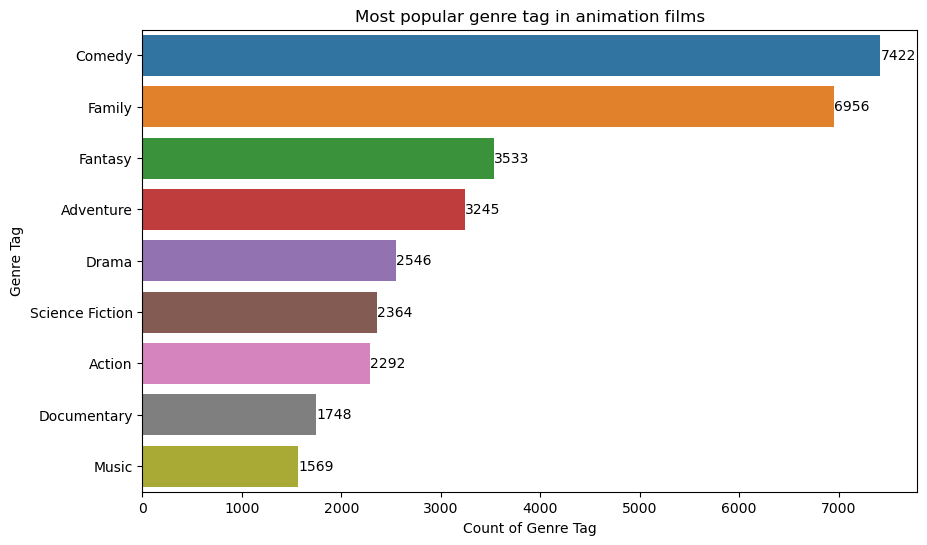

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=frequency_df, x=0, y=frequency_df.index, estimator="sum")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Most popular genre tag in animation films')
plt.xlabel('Count of Genre Tag')
plt.ylabel('Genre Tag')
plt.show()

This answers our first question. We can see that the most popular tags are Comedy and Family

#### Task 2: Extract key insights on budget and revenue trends in the animation film industry.

Next, we can look at the both the budget and revenue trends

We can create a new dataframe with the 3 columns we need for this, 'release_date','revenue', and 'budget'


In [21]:
df1 = df[['release_date','revenue','budget']]

Next, let's have a quick look at the correlation between the revenue and budget

In [22]:
df1.corr()

,release_date,revenue,budget
release_date,1.000000,0.033095,0.042659
revenue,0.033095,1.000000,0.768455
budget,0.042659,0.768455,1.000000


There is a clear positive correlation between budget and revenue at 0.768. We can see this better by plotting a regression plot. The data is spread out, so having a line of best fit shows the trend clearer.

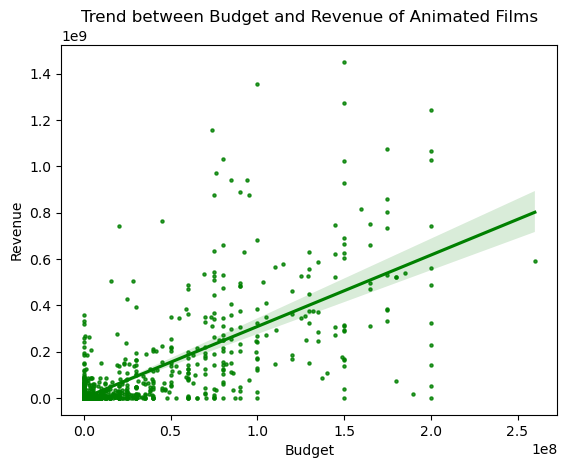

In [23]:
sns.regplot(df1,x='budget',y='revenue', scatter_kws={'s':5}, color='green')
plt.title('Trend between Budget and Revenue of Animated Films')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

#### Top 10's

I will create graphs showing the Top 10's is different categories

##### Top 10 Movies by Popularity


In [24]:
df1 = df.sort_values(by='popularity',ascending=False).head(10)

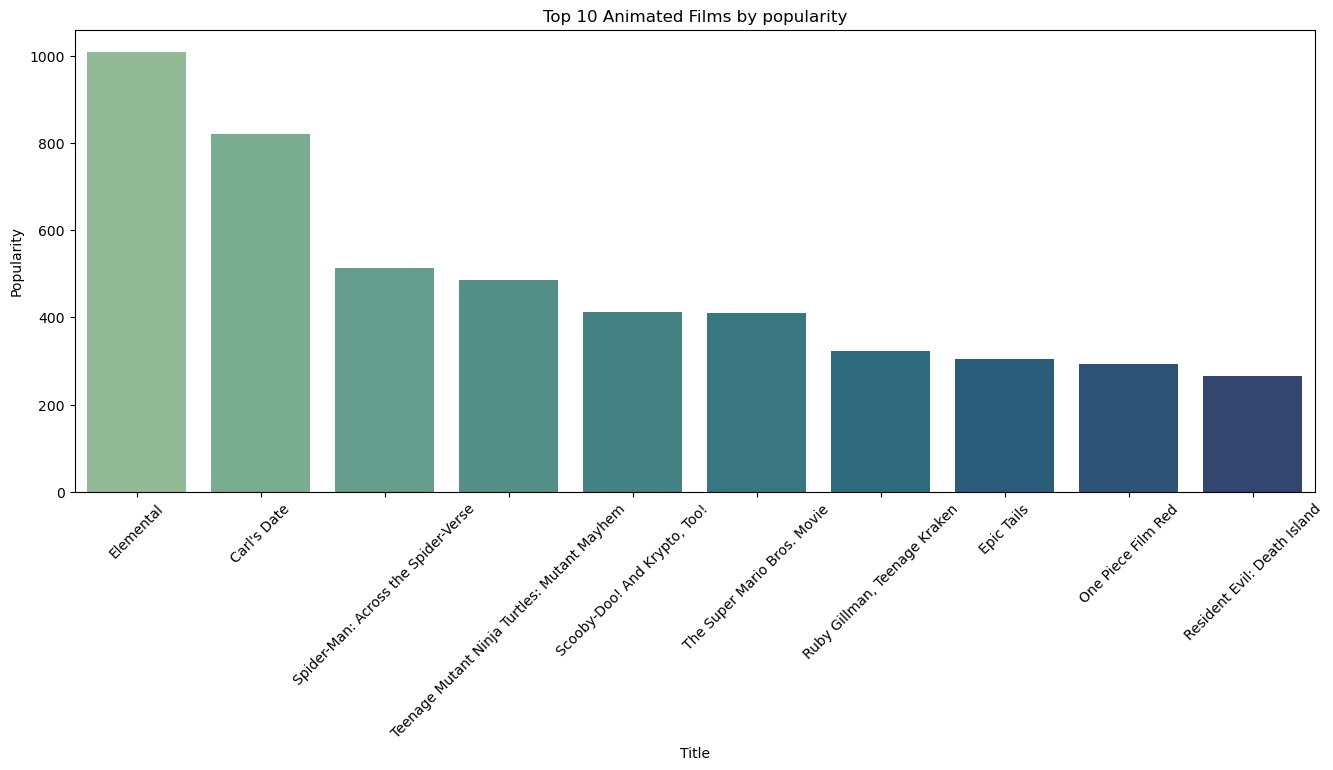

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(data=df1, x='title',y='popularity', palette="crest")
plt.xticks(rotation=45, fontsize=10)
plt.title('Top 10 Animated Films by popularity')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.show()

##### Top 10 Animated Films by Revenue


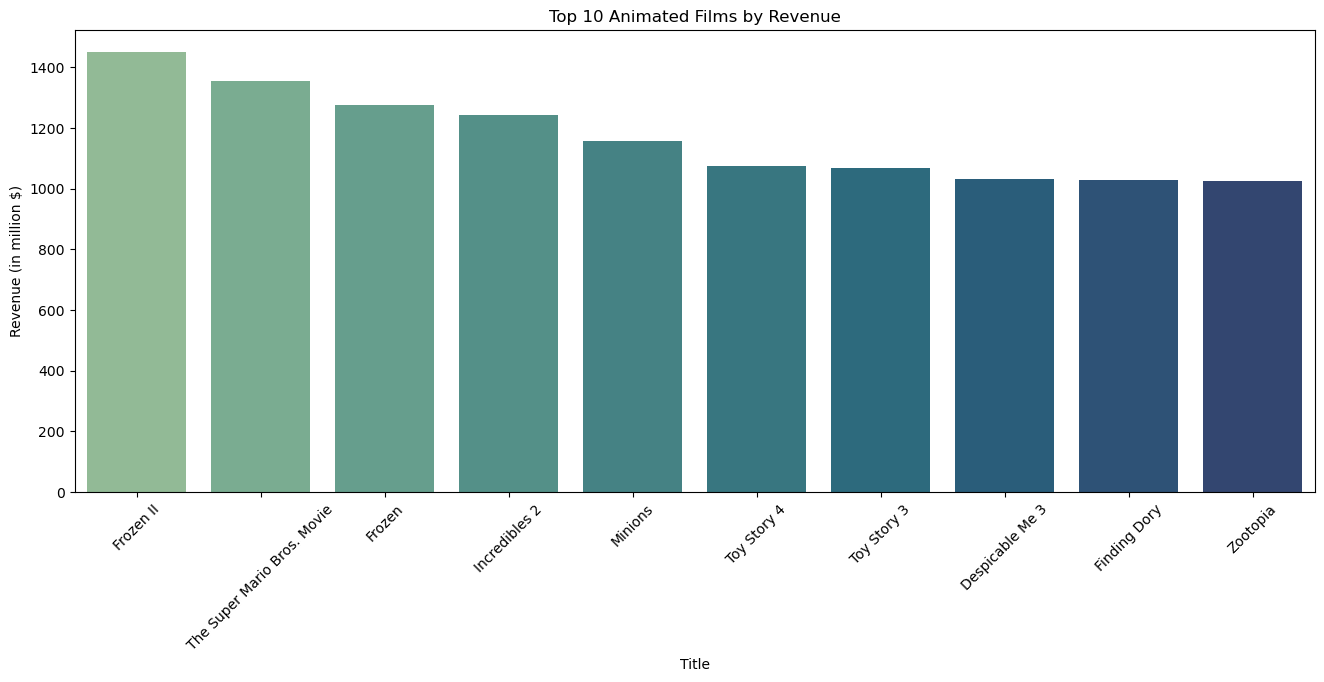

In [26]:
df2 = df.sort_values(by='revenue',ascending=False).head(10)
df2['revenue'] = df2['revenue'] / 1000000

plt.figure(figsize=(16,6))
sns.barplot(data=df2, x='title',y='revenue',palette="crest")
plt.xticks(rotation=45)
plt.ylabel('Revenue (in million $)')
plt.xlabel('Title')
plt.title('Top 10 Animated Films by Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()